<a href="https://colab.research.google.com/github/Kailash1917/TP_2/blob/main/Tp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Charger les données dans un DataFrame PySpark :


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

# Créer une session Spark
spark = SparkSession.builder.appName("Netflix Missing Data Analysis").getOrCreate()

# Charger les données
file_path = "/content/netflix1.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Afficher un aperçu des données
df.show()


+-------+-------+--------------------+--------------------+--------------+----------+------------+------+---------+--------------------+
|show_id|   type|               title|            director|       country|date_added|release_year|rating| duration|           listed_in|
+-------+-------+--------------------+--------------------+--------------+----------+------------+------+---------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson| United States| 9/25/2021|        2020| PG-13|   90 min|       Documentaries|
|     s3|TV Show|           Ganglands|     Julien Leclercq|        France| 9/24/2021|        2021| TV-MA| 1 Season|Crime TV Shows, I...|
|     s6|TV Show|       Midnight Mass|       Mike Flanagan| United States| 9/24/2021|        2021| TV-MA| 1 Season|TV Dramas, TV Hor...|
|    s14|  Movie|Confessions of an...|       Bruno Garotti|        Brazil| 9/22/2021|        2021| TV-PG|   91 min|Children & Family...|
|     s8|  Movie|             Sankofa|   

Identifier et remplacer les valeurs non significatives par null : Liste des valeurs non significatives : "Not Given", "N/A"

In [2]:
# Remplacer les valeurs non significatives par null
df_cleaned = df.replace(["Not Given", "N/A"], None)

# Vérifier le nombre de valeurs manquantes par colonne
df_cleaned.select([when(df_cleaned[col].isNull(), 1).otherwise(0).alias(col) for col in df_cleaned.columns]).show()


+-------+----+-----+--------+-------+----------+------------+------+--------+---------+
|show_id|type|title|director|country|date_added|release_year|rating|duration|listed_in|
+-------+----+-----+--------+-------+----------+------------+------+--------+---------+
|      0|   0|    0|       0|      0|         0|           0|     0|       0|        0|
|      0|   0|    0|       0|      0|         0|           0|     0|       0|        0|
|      0|   0|    0|       0|      0|         0|           0|     0|       0|        0|
|      0|   0|    0|       0|      0|         0|           0|     0|       0|        0|
|      0|   0|    0|       0|      0|         0|           0|     0|       0|        0|
|      0|   0|    0|       0|      0|         0|           0|     0|       0|        0|
|      0|   0|    0|       0|      0|         0|           0|     0|       0|        0|
|      0|   0|    0|       0|      0|         0|           0|     0|       0|        0|
|      0|   0|    0|       0|   

Étape 2 : Visualisation des données manquantes
Convertir en DataFrame Pandas pour visualisation avec Missingno : Limiter la taille des données si nécessaire pour éviter une surcharge mémoire.

<Axes: >

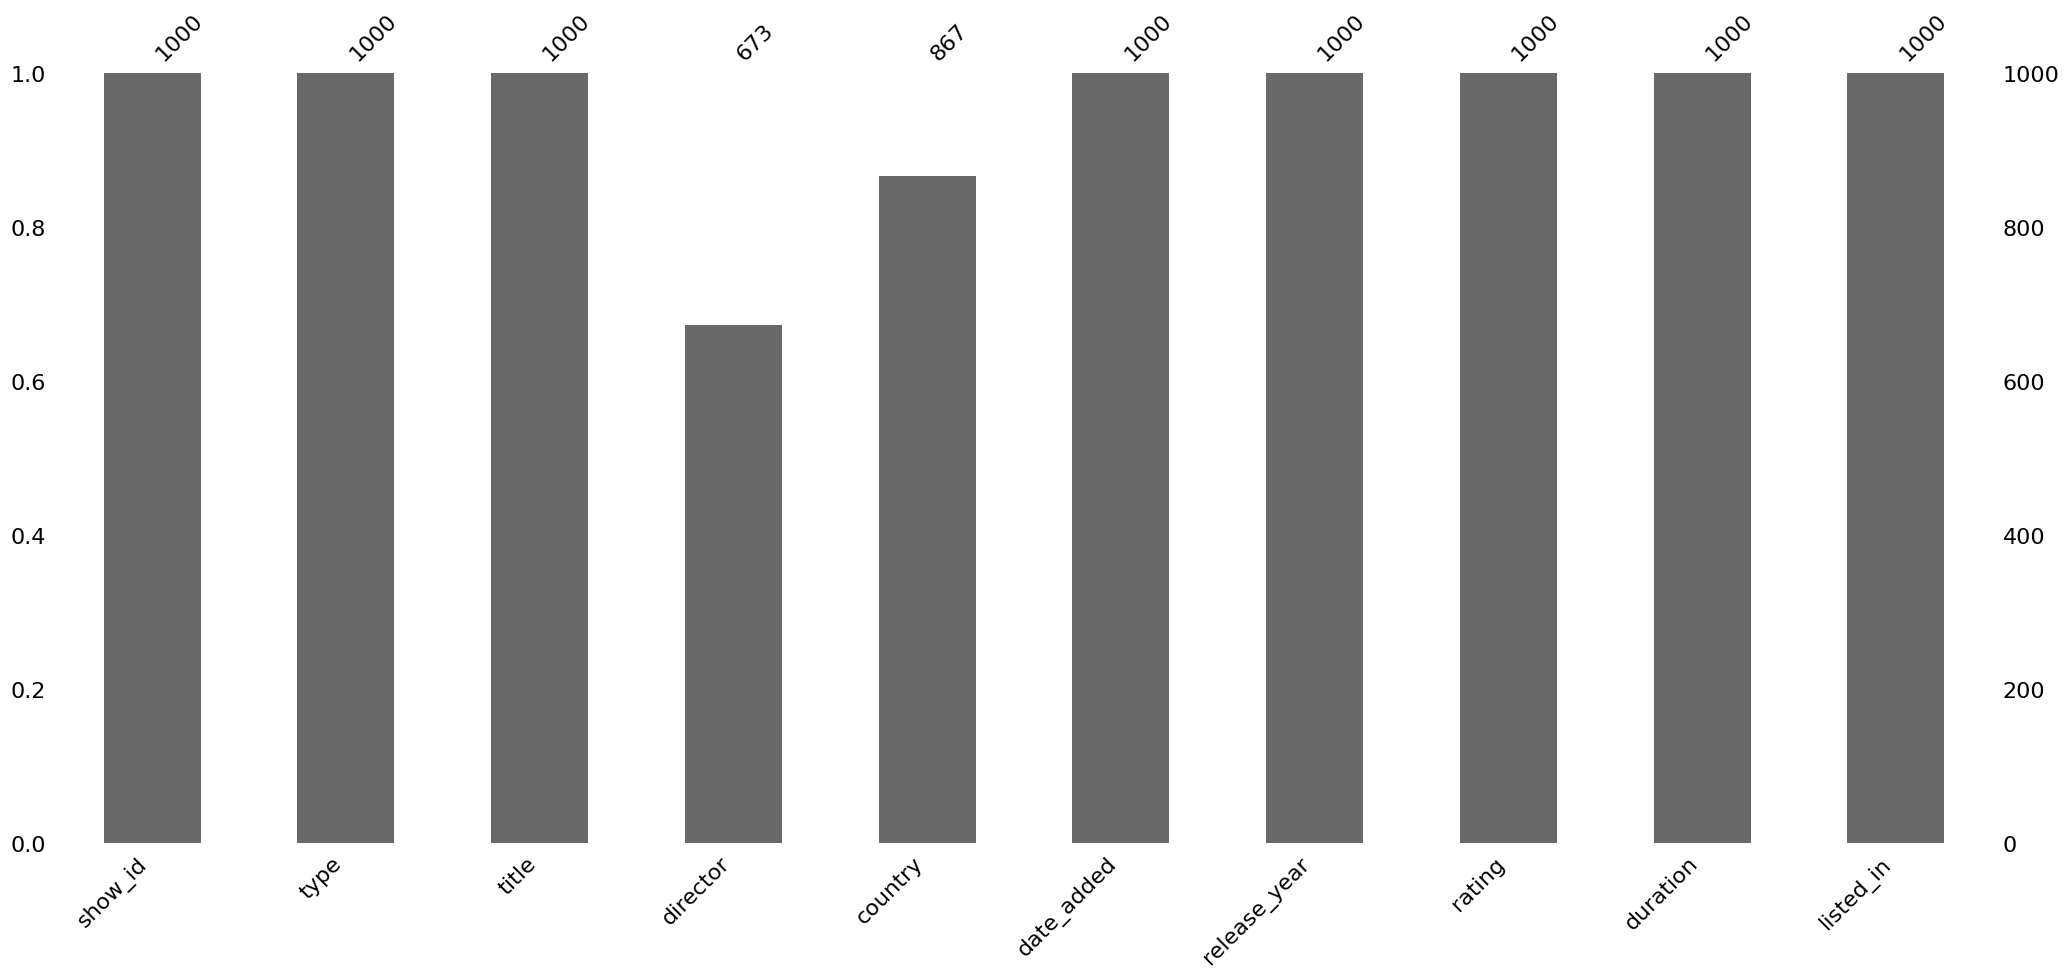

In [3]:
import pandas as pd
import missingno as msno

# Convertir en Pandas DataFrame
df_pandas = df_cleaned.limit(1000).toPandas()

# Visualiser la répartition des données manquantes
msno.bar(df_pandas)


Étape 3 : Nettoyage et réinspection
Supprimer les lignes manquantes dans des colonnes clés : Par exemple, supprimer les lignes où director ou country est manquant.

In [4]:
df_filtered = df_cleaned.dropna(subset=["director", "country"])

# Vérifier les données après suppression
df_filtered.show()


+-------+-------+--------------------+--------------------+--------------+----------+------------+------+---------+--------------------+
|show_id|   type|               title|            director|       country|date_added|release_year|rating| duration|           listed_in|
+-------+-------+--------------------+--------------------+--------------+----------+------------+------+---------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson| United States| 9/25/2021|        2020| PG-13|   90 min|       Documentaries|
|     s3|TV Show|           Ganglands|     Julien Leclercq|        France| 9/24/2021|        2021| TV-MA| 1 Season|Crime TV Shows, I...|
|     s6|TV Show|       Midnight Mass|       Mike Flanagan| United States| 9/24/2021|        2021| TV-MA| 1 Season|TV Dramas, TV Hor...|
|    s14|  Movie|Confessions of an...|       Bruno Garotti|        Brazil| 9/22/2021|        2021| TV-PG|   91 min|Children & Family...|
|     s8|  Movie|             Sankofa|   

Comparer les données nettoyées avec un nouveau graphique Missingno :

<Axes: >

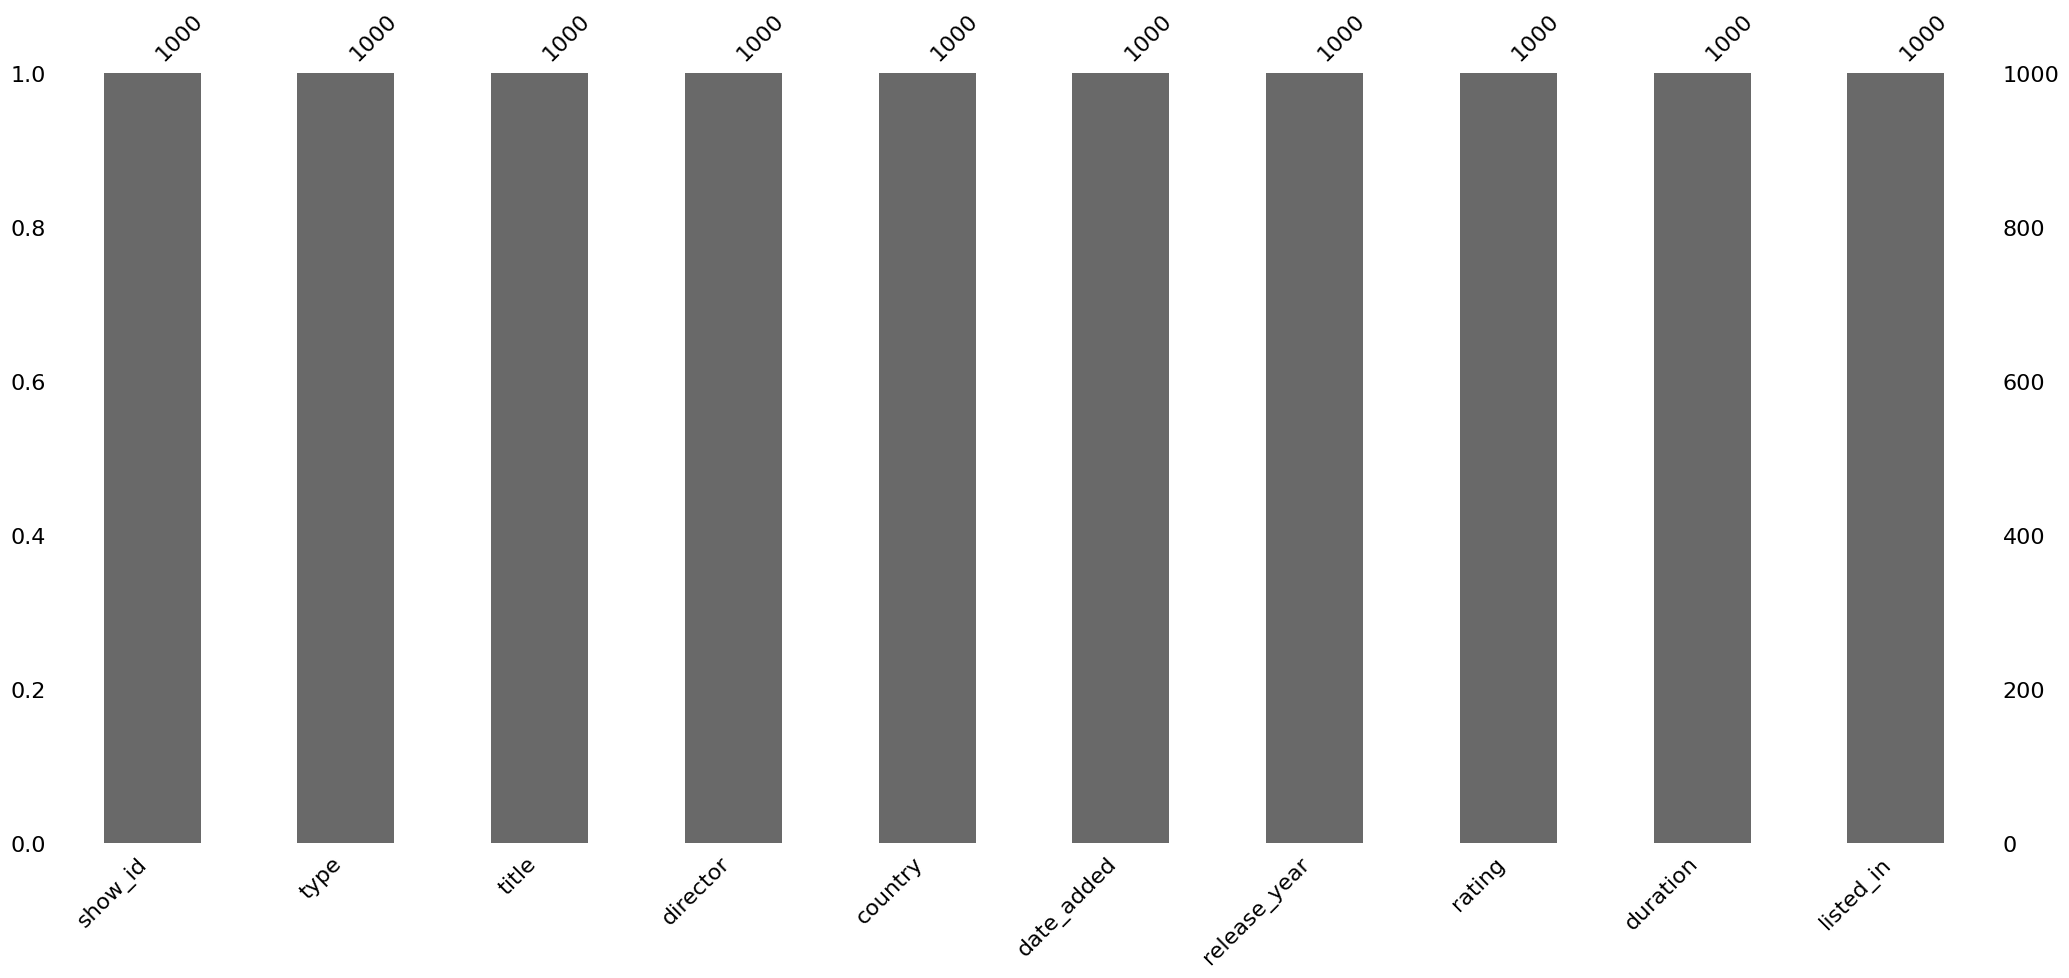

In [5]:
df_pandas_filtered = df_filtered.limit(1000).toPandas()
msno.bar(df_pandas_filtered)


Étape 4 : Analyses complémentaires
Réfléchir à d’autres approches de traitement des données manquantes :

Imputation : Remplir les valeurs manquantes par une moyenne/médiane.
Suppression ciblée : Supprimer uniquement les lignes avec un pourcentage élevé de données manquantes.
Exemple d'imputation pour une colonne numérique :

In [7]:
# Compter les valeurs nulles dans la colonne "rating"
df_cleaned.select("rating").filter(df_cleaned["rating"].isNull()).count()


1